# KDD Cup 2009 Dataset

Knowledge Discovery and Data Mining (KDD) conferece is one of the most important competitions in Machine Learning anda data mining. Every year KDD ofers a data analysis competion, the KDD Cup.

In 2009, The KDD Cup offered the opportunity to work on large marketing databases from the French Telecom company Orange to predict the propensity of customers to switch provider (churn), buy new products or services (appetency), or buy upgrades or add-ons proposed to them to make the sale more profitable (up-selling)

This notebook performs analysis and creates predictive models for the small version of the dataset.

In [0]:
import numpy as np
import pandas as pd

Carregando variáveis do conjunto de dados:

In [11]:
train = pd.read_table('orange_small_train.data')
train.head(20)

,Var1,Var2,Var3,Var4,Var5,Var6,Var7,Var8,Var9,Var10,...,Var221,Var222,Var223,Var224,Var225,Var226,Var227,Var228,Var229,Var230
0,NaN,NaN,NaN,NaN,NaN,1526.0,7.0,NaN,NaN,NaN,...,oslk,fXVEsaq,jySVZNlOJy,NaN,NaN,xb3V,RAYp,F2FyR07IdsN7I,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,525.0,0.0,NaN,NaN,NaN,...,oslk,2Kb5FSF,LM8l689qOp,NaN,NaN,fKCe,RAYp,F2FyR07IdsN7I,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,5236.0,7.0,NaN,NaN,NaN,...,Al6ZaUT,NKv4yOc,jySVZNlOJy,NaN,kG3k,Qu4f,02N6s8f,ib5G6X1eUxUn6,am7c,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,...,oslk,CE7uk3u,LM8l689qOp,NaN,NaN,FSa2,RAYp,F2FyR07IdsN7I,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,1029.0,7.0,NaN,NaN,NaN,...,oslk,1J2cvxe,LM8l689qOp,NaN,kG3k,FSa2,RAYp,F2FyR07IdsN7I,mj86,NaN
5,NaN,NaN,NaN,NaN,NaN,658.0,7.0,NaN,NaN,NaN,...,zCkv,QqVuch3,LM8l689qOp,NaN,NaN,Qcbd,02N6s8f,Zy3gnGM,am7c,NaN
6,NaN,NaN,NaN,NaN,NaN,1680.0,7.0,NaN,NaN,NaN,...,oslk,XlgxB9z,LM8l689qOp,NaN,kG3k,FSa2,RAYp,55YFVY9,am7c,NaN
7,NaN,NaN,NaN,NaN,NaN,77.0,0.0,NaN,NaN,NaN,...,oslk,R2LdzOv,NaN,NaN,NaN,FSa2,RAYp,F2FyR07IdsN7I,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,1176.0,7.0,NaN,NaN,NaN,...,zCkv,K2SqEo9,jySVZNlOJy,NaN,kG3k,PM2D,6fzt,am14IcfM7tWLrUmRT52KtA,am7c,NaN
9,NaN,NaN,NaN,NaN,NaN,1141.0,7.0,NaN,NaN,NaN,...,oslk,EPqQcw6,LM8l689qOp,NaN,kG3k,FSa2,RAYp,55YFVY9,NaN,NaN


In [12]:
test = pd.read_table('orange_small_test.data')
test.head()

,Var1,Var2,Var3,Var4,Var5,Var6,Var7,Var8,Var9,Var10,...,Var221,Var222,Var223,Var224,Var225,Var226,Var227,Var228,Var229,Var230
0,NaN,NaN,NaN,NaN,NaN,1225.0,7.0,NaN,NaN,NaN,...,Al6ZaUT,P6pu4Vl,LM8l689qOp,NaN,ELof,7P5s,ZI9m,R4y5gQQWY8OodqDV,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,259.0,0.0,NaN,NaN,NaN,...,oslk,S46Rt72,LM8l689qOp,NaN,NaN,Qu4f,RAYp,F2FyR07IdsN7I,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,861.0,14.0,NaN,NaN,NaN,...,oslk,CcdTy9x,LM8l689qOp,NaN,NaN,7aLG,RAYp,F2FyR07IdsN7I,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,1568.0,7.0,NaN,NaN,NaN,...,oslk,Q53Rkup,LM8l689qOp,NaN,kG3k,7P5s,RAYp,TCU50_Yjmm6GIBZ0lL_,am7c,NaN
4,NaN,NaN,NaN,NaN,NaN,1197.0,7.0,NaN,NaN,NaN,...,Al6ZaUT,WfsWw2A,LM8l689qOp,NaN,ELof,5Acm,ZI9m,iyHGyLCEkQ,am7c,NaN


In [0]:
appetency = pd.read_table('orange_small_train_appetency.labels', header = None).loc[:, 0].astype('category')

In [0]:
churn = pd.read_table('orange_small_train_churn.labels', header = None).loc[:, 0].astype('category')

In [0]:
upselling= pd.read_table('orange_small_train_upselling.labels', header = None).loc[:, 0].astype('category')

# Preprocesing

In [38]:
#Dataset Analysis
train.describe()

,Var1,Var2,Var3,Var4,Var5,Var6,Var7,Var8,Var9,Var10,...,Var183,Var184,Var185,Var186,Var187,Var188,Var189,Var190,Var209,Var230
count,702.000000,1241.000000,1240.000000,1579.000000,1.487000e+03,44471.000000,44461.000000,0.0,702.000000,1.487000e+03,...,1.241000e+03,1241.000000,0.0,702.000000,702.00000,1241.000000,21022.000000,333.000000,0.0,0.0
mean,11.487179,0.004029,425.298387,0.125396,2.387933e+05,1326.437116,6.809496,NaN,48.145299,3.926057e+05,...,7.777380e+04,8.460919,NaN,3.299145,16.54416,167.368477,270.142137,22007.045192,NaN,NaN
std,40.709951,0.141933,4270.193518,1.275481,6.441259e+05,2685.693668,6.326053,NaN,154.777855,9.280896e+05,...,2.016188e+05,46.973777,NaN,8.781967,60.22303,113.980072,86.707692,29085.146490,NaN,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,NaN,0.000000,0.000000e+00,...,0.000000e+00,0.000000,NaN,0.000000,0.00000,-6.420000,6.000000,0.000000,NaN,NaN
25%,0.000000,0.000000,0.000000,0.000000,0.000000e+00,518.000000,0.000000,NaN,4.000000,0.000000e+00,...,0.000000e+00,0.000000,NaN,0.000000,0.00000,19.380000,204.000000,2732.670000,NaN,NaN
50%,0.000000,0.000000,0.000000,0.000000,0.000000e+00,861.000000,7.000000,NaN,20.000000,0.000000e+00,...,0.000000e+00,0.000000,NaN,0.000000,4.00000,197.640000,270.000000,12668.940000,NaN,NaN
75%,16.000000,0.000000,0.000000,0.000000,1.187425e+05,1428.000000,7.000000,NaN,46.000000,2.628630e+05,...,4.881000e+04,8.000000,NaN,6.000000,14.00000,252.960000,330.000000,29396.340000,NaN,NaN
max,680.000000,5.000000,130668.000000,27.000000,6.048550e+06,131761.000000,140.000000,NaN,2300.000000,1.232559e+07,...,3.048400e+06,1200.000000,NaN,102.000000,910.00000,628.620000,642.000000,230427.000000,NaN,NaN


In [0]:
#Replacing NAN values by mean
train = train.fillna(train.mean())

In [0]:
#Removing non-numerical values
droplist = []

for i in range(train.shape[1]-40, train.shape[1]+1):
    value = 0
    value = 'Var{}'.format(i)
    droplist.append(value)

In [0]:
train = train.drop(droplist,axis=1)
train = train.fillna(0) 

In [0]:
#Changing labels to 0 or 1
appetency = (appetency + 1)/2
churn = (churn + 1)/2
upselling = (upselling + 1)/2

In [49]:
appetency.describe()

count    50000.000000
mean         0.017800
std          0.132225
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: 0, dtype: float64

The mean suggest a imbalanced category. Thus, we need to investigate.


In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
labels = pd.concat([appetency, churn, upselling],axis=1)
labels.columns = ['appetency', 'churn', 'upselling']

No handles with labels found to put in legend.


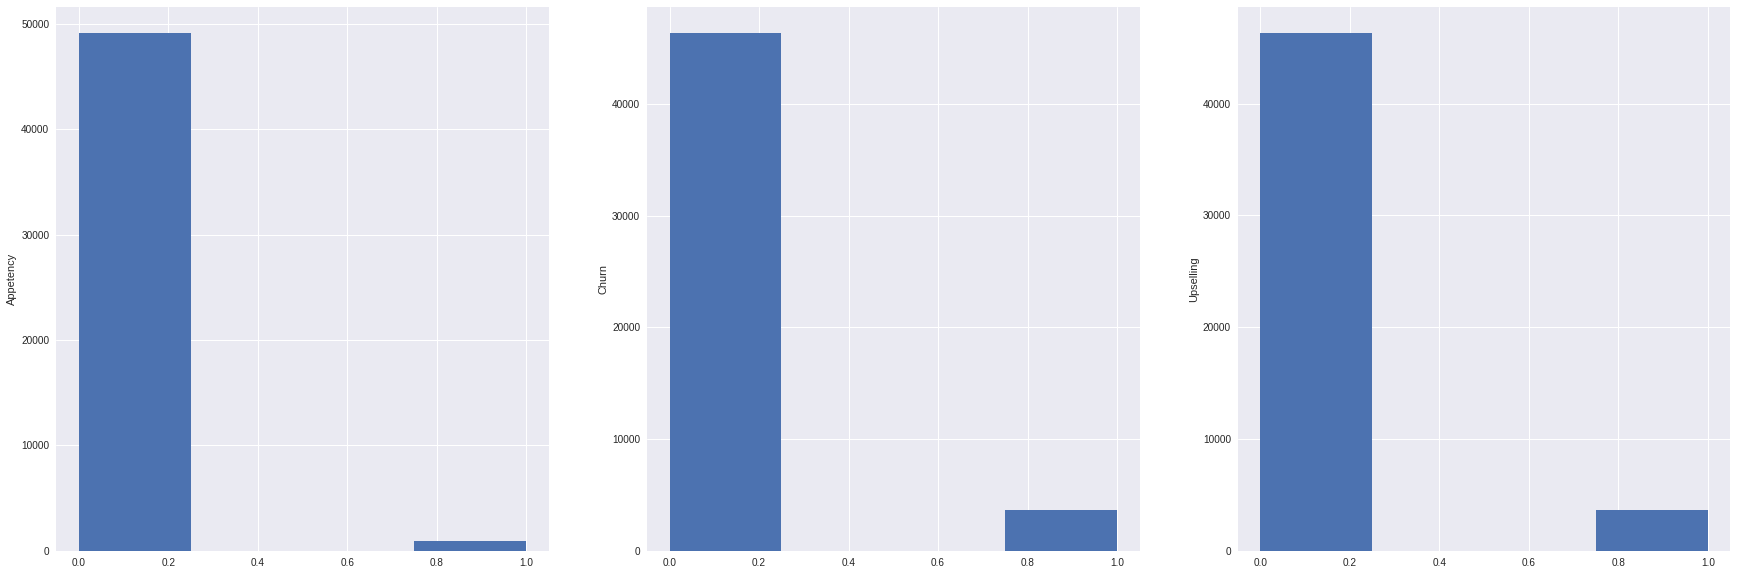

In [54]:
#Verifying balance
fig = plt.figure(figsize=(30, 10))

plt.subplot(131)
ax0 = appetency.hist(bins=4)
ax0.set_ylabel('{}'.format('Appetency'))

plt.subplot(132)
ax1= churn.hist(bins=4)
ax1.set_ylabel('{}'.format('Churn'))               

plt.subplot(133)
ax2 = upselling.hist(bins=4)
ax2.set_ylabel('{}'.format('Upselling'))

plt.legend()

In the previous graphic, we see clear imbalance in all classes. Therefore, we can use resample as a workaround.

# Building models

In [0]:
RANDOM_SEED = 42 #reproductivity

In [0]:

data = pd.concat([train,labels],axis=1)

In [0]:

import seaborn as sns

**Appetency**

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
from sklearn.metrics import (confusion_matrix, precision_recall_curve, auc,
                             roc_curve, recall_score, classification_report, f1_score,
                             precision_recall_fscore_support,roc_auc_score)

In [0]:
from sklearn.neural_network import MLPClassifier

In [0]:
datatrain = data.drop(['churn','upselling'],axis=1)
df_maj = datatrain[datatrain.appetency==0]
df_min = datatrain[datatrain.appetency==1]
df_maj.shape,df_min.shape 
# Upsample minority class
df_min_upsampled = resample(df_min, 
                                replace=True,     # sample with replacement
                                 n_samples=df_maj.shape[0],    # to match majority class
                                 random_state=RANDOM_SEED) # reproducible results

df_upsampled = pd.concat([df_maj, df_min_upsampled])
df_X = df_upsampled.drop(['appetency'],axis=1)
df_y = df_upsampled['appetency']


X_train, X_test, y_train, y_test = train_test_split(df_X,df_y ,test_size=0.2, random_state=RANDOM_SEED)
X_train = X_train.values
X_test = X_test.values
y_train = y_train
y_test = y_test

X_train = preprocessing.scale(X_train)
X_test = preprocessing.scale(X_test)

In [0]:
clf = MLPClassifier(hidden_layer_sizes=(128,64,32,16,8),learning_rate_init = 0.01, max_iter = 500)

In [0]:
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)

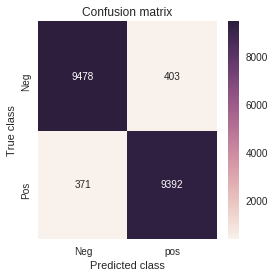

In [97]:
#Generating confusion matrix
conf_matrix = confusion_matrix(y_test, predictions)
plt.figure(figsize=(4, 4))
sns.heatmap(conf_matrix,  annot=True,xticklabels=['Neg','pos'], yticklabels=['Neg','Pos'],fmt="d")
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

In [98]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

         0.0       0.96      0.96      0.96      9881
         1.0       0.96      0.96      0.96      9763

   micro avg       0.96      0.96      0.96     19644
   macro avg       0.96      0.96      0.96     19644
weighted avg       0.96      0.96      0.96     19644



**Using AUC metric**

In [99]:
x = df_X.loc[:]
y = df_y.loc[:]

cv = StratifiedKFold(n_splits=5,shuffle=True)
i =0
aucs2 = []
for train,test in cv.split(x,y):
    print('{}%'.format(i*20))
    X_train = x.iloc[train]
    X_test = x.iloc[test]
    y_train = y.iloc[train]
    y_test = y.iloc[test]
    
    X_train = preprocessing.scale(X_train)
    X_test = preprocessing.scale(X_test)
    
    pred = clf.fit(X_train,y_train).predict(X_test)
    aucs2.append(roc_auc_score(y_test, pred))
    i=i+1

AUC2 = '{}+-{}'.format(round(np.average(aucs2), 2),round(np.std(aucs2),2))
print('AUC:', AUC2 )

0%


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  from ipykernel import kernelapp as app


20%


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  from ipykernel import kernelapp as app


40%


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  from ipykernel import kernelapp as app


60%


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  from ipykernel import kernelapp as app


80%


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  from ipykernel import kernelapp as app


AUC: 0.94+-0.02


Using AUC metric with k-fold and k = 5, we obtained 0.94, which represents and excelent performance of the classifier for the Appetency problem. We may say that the network is realy capable of predicting when the client will desire other products or services.

**Churn**

In [0]:
datatrain = data.drop(['appetency','upselling'],axis=1)
df_maj = datatrain[datatrain.churn==0]
df_min = datatrain[datatrain.churn==1]
df_maj.shape,df_min.shape 
# Upsample minority class
df_min_upsampled = resample(df_min, 
                                replace=True,     # sample with replacement
                                 n_samples=df_maj.shape[0],    # to match majority class
                                 random_state=RANDOM_SEED) # reproducible results

df_upsampled = pd.concat([df_maj, df_min_upsampled])
df_X = df_upsampled.drop(['churn'],axis=1)
df_y = df_upsampled['churn']


X_train, X_test, y_train, y_test = train_test_split(df_X,df_y ,test_size=0.2, random_state=RANDOM_SEED)
X_train = X_train.values
X_test = X_test.values
y_train = y_train
y_test = y_test

X_train = preprocessing.scale(X_train)
X_test = preprocessing.scale(X_test)

In [0]:
clf = MLPClassifier(hidden_layer_sizes=(256,128,64,32,16,8),learning_rate_init = 0.01, max_iter = 800)

In [0]:
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)

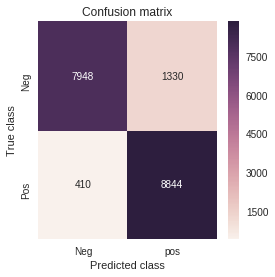

In [112]:
#Gerando Matriz de Confusão
conf_matrix = confusion_matrix(y_test, predictions)
plt.figure(figsize=(4, 4))
sns.heatmap(conf_matrix,  annot=True,xticklabels=['Neg','pos'], yticklabels=['Neg','Pos'],fmt="d")
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

In [113]:
x = df_X.loc[:]
y = df_y.loc[:]

cv = StratifiedKFold(n_splits=5,shuffle=True)
i =0
aucs2 = []
for train,test in cv.split(x,y):
    print('{}%'.format(i*20))
    X_train = x.iloc[train]
    X_test = x.iloc[test]
    y_train = y.iloc[train]
    y_test = y.iloc[test]
    
    X_train = preprocessing.scale(X_train)
    X_test = preprocessing.scale(X_test)
    
    pred = clf.fit(X_train,y_train).predict(X_test)
    aucs2.append(roc_auc_score(y_test, pred))
    i=i+1

AUC2 = '{}+-{}'.format(round(np.average(aucs2), 2),round(np.std(aucs2),2))
print('AUC:', AUC2 )

0%


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  from ipykernel import kernelapp as app


20%


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  from ipykernel import kernelapp as app


40%


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  from ipykernel import kernelapp as app


60%


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  from ipykernel import kernelapp as app


80%


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  from ipykernel import kernelapp as app


AUC: 0.86+-0.03


Churn rate is also sometimes called attrition rate. It is one of two primary factors that determine the steady-state level of customers a business will support. In its broadest sense, churn rate is a measure of the number of individuals or items moving into or out (our case) of a collection over a specific period of time. 

We can say that the model created attended the problem with success, not only due to the good AUC (0.86) metric, but also the great number of True Positives well detected, as exposed in the confusion matrix.



**Upselling**

In [0]:
datatrain = data.drop(['appetency','churn'],axis=1)
df_maj = datatrain[datatrain.upselling==0]
df_min = datatrain[datatrain.upselling==1]
df_maj.shape,df_min.shape 
# Upsample minority class
df_min_upsampled = resample(df_min, 
                                replace=True,     # sample with replacement
                                 n_samples=df_maj.shape[0],    # to match majority class
                                 random_state=RANDOM_SEED) # reproducible results

df_upsampled = pd.concat([df_maj, df_min_upsampled])
df_X = df_upsampled.drop(['upselling'],axis=1)
df_y = df_upsampled['upselling']


X_train, X_test, y_train, y_test = train_test_split(df_X,df_y ,test_size=0.2, random_state=RANDOM_SEED)
X_train = X_train.values
X_test = X_test.values
y_train = y_train
y_test = y_test

X_train = preprocessing.scale(X_train)
X_test = preprocessing.scale(X_test)

In [0]:
clf = MLPClassifier(hidden_layer_sizes=(256,128,64,32,16,8),learning_rate_init = 0.01, max_iter = 800)

In [0]:
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)

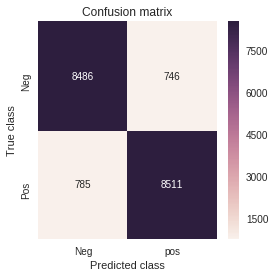

In [120]:
#Generating Confusion Matrix
conf_matrix = confusion_matrix(y_test, predictions)
plt.figure(figsize=(4, 4))
sns.heatmap(conf_matrix,  annot=True,xticklabels=['Neg','pos'], yticklabels=['Neg','Pos'],fmt="d")
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

In [121]:
x = df_X.loc[:]
y = df_y.loc[:]

cv = StratifiedKFold(n_splits=5,shuffle=True)
i =0
aucs2 = []
for train,test in cv.split(x,y):
    print('{}%'.format(i*20))
    X_train = x.iloc[train]
    X_test = x.iloc[test]
    y_train = y.iloc[train]
    y_test = y.iloc[test]
    
    X_train = preprocessing.scale(X_train)
    X_test = preprocessing.scale(X_test)
    
    pred = clf.fit(X_train,y_train).predict(X_test)
    aucs2.append(roc_auc_score(y_test, pred))
    i=i+1

AUC2 = '{}+-{}'.format(round(np.average(aucs2), 2),round(np.std(aucs2),2))
print('AUC:', AUC2 )

0%


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  from ipykernel import kernelapp as app


20%


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  from ipykernel import kernelapp as app


40%


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  from ipykernel import kernelapp as app


60%


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  from ipykernel import kernelapp as app


80%


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  from ipykernel import kernelapp as app


AUC: 0.86+-0.1


The model exposed previously presents good AUC metric (0.86). Thus, it is a model that can address well the Upselling situation. With this result, the company is able to create upselling techniques, trying to sell aditional products and upgrades to customers.
